# Classification of Cancer Cells using Support Vector Machine(Comparitive Study) by `Mr. Harshit Dawar`!

## Importing the Required Libraries

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
# Downloading the dataset
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-05-22 15:45:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0.001s  

2020-05-22 15:45:37 (25.4 MB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [5]:
# Loading the data
data = pd.read_csv("cell_samples.csv")

In [6]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [57]:
# Checking the data types of the data
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [34]:
# Checking the unique values of the classes
data["Class"].unique()

array([2, 4])

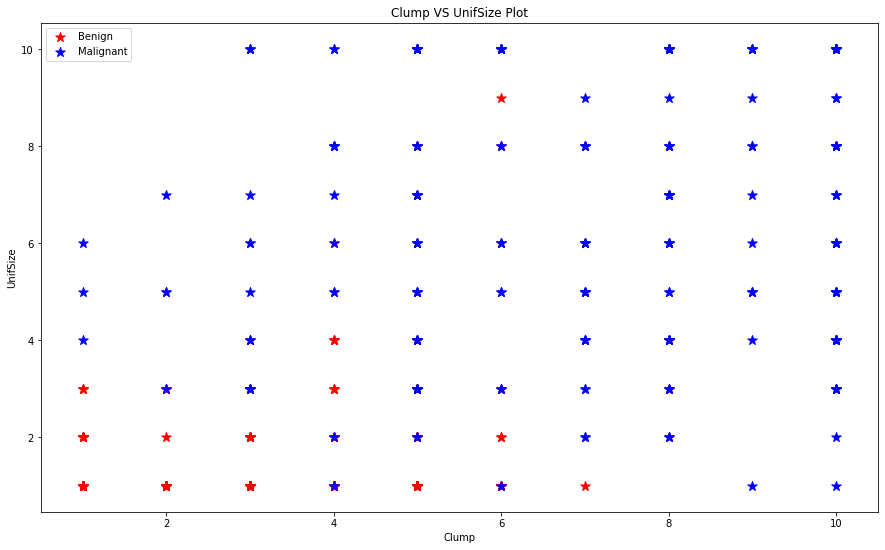

In [48]:
# Creating a scatter plot to visualize the cells of magnanin and Benign Cells

fig, ax = plt.subplots(figsize = (15,9))

ax.scatter(
    data[data["Class"] == 2]["Clump"],
           data[data["Class"] == 2]["UnifSize"],
           c = "RED",
           s = 100,
           marker = "*",
           label = "Benign"
          )

ax.scatter(
    data[data["Class"] == 4]["Clump"],
           data[data["Class"] == 4]["UnifSize"],
           c = "Blue",
           s = 100,
           marker = "*",
           label = "Malignant"
          )

ax.set(
    xlabel = "Clump",
       ylabel = "UnifSize",
       title = "Clump VS UnifSize Plot"
)

ax.legend()

plt.show()

## Data PreProcessing

In [58]:
# Checking Null Values in the Data
data.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [59]:
# Checking the unique values of BareNuc
data["BareNuc"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [65]:
# Replacing the "?" in BareNuc 
for i in range(len(data)):
    if data["BareNuc"][i] == "?":
        data["BareNuc"][i] = 0

In [66]:
# Checking the unique values of BareNuc Again
data["BareNuc"].unique()

array(['1', '10', '2', '4', '3', '9', '7', 0, '5', '8', '6'], dtype=object)

In [68]:
# Converting categorical to Numerical Form
data["BareNuc"] = pd.to_numeric(data["BareNuc"], errors = "coerce").astype(int)

In [69]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [70]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [71]:
features = data.drop(["ID", "Class"], axis = 1)
target = data["Class"]

In [72]:
features.shape

(699, 9)

In [73]:
target.shape

(699,)

## Data Splitting for Training & Testing

In [76]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state = 5)

In [77]:
x_train.shape, y_train.shape

((594, 9), (594,))

## Training SVM with RBF Kernel
* Process of mapping data into higher dimensions or higher dimensional space is known as Kernelling.
* The mathematical function used for the above transformation is known as kernel function.

In [83]:
# Using kernel Radial Basis Function (RBF)
classifier = SVC(kernel = "rbf")

In [84]:
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
classifier.score(x_test, y_test)

0.9333333333333333

In [86]:
y_pred = classifier.predict(x_test)

In [88]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.93      0.95        68
           4       0.88      0.95      0.91        37

    accuracy                           0.93       105
   macro avg       0.92      0.94      0.93       105
weighted avg       0.94      0.93      0.93       105



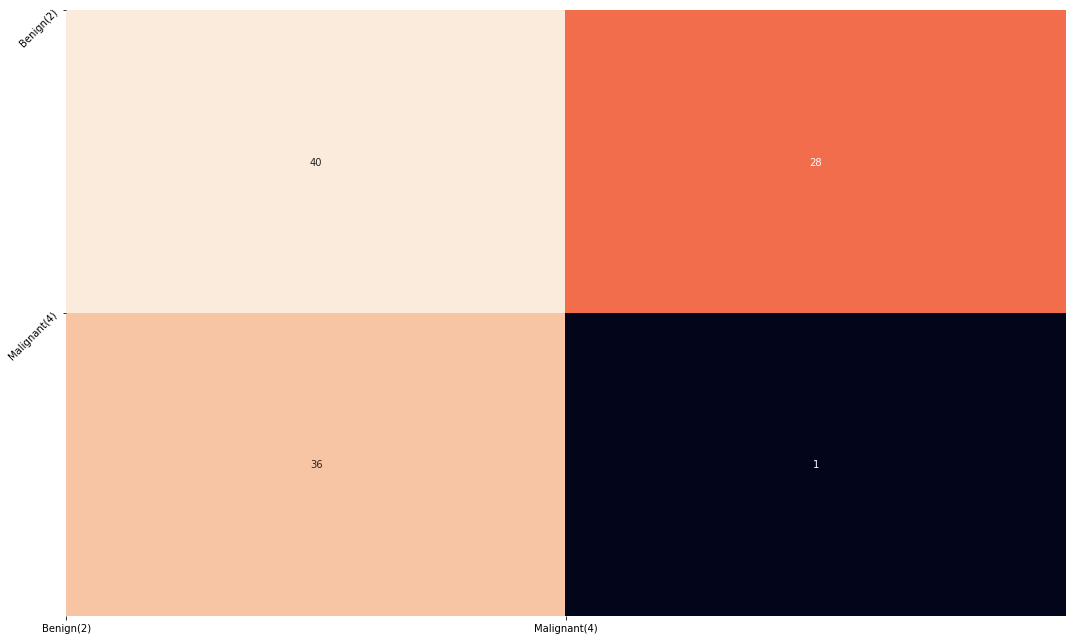

In [119]:
plt.figure(figsize = (15, 9))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cbar = False)
plt.xticks(np.arange(len(data["Class"].unique())), labels = ["Benign(2)", "Malignant(4)"])
plt.yticks(np.arange(len(data["Class"].unique())), labels = ["Benign(2)", "Malignant(4)"], rotation = 45)
plt.tight_layout()
plt.show()

## Training SVM with Linear Kernel

Score of the Model =  0.9238095238095239
Accuracy of the Model =  0.9238095238095239
              precision    recall  f1-score   support

           2       0.95      0.93      0.94        68
           4       0.87      0.92      0.89        37

    accuracy                           0.92       105
   macro avg       0.91      0.92      0.92       105
weighted avg       0.93      0.92      0.92       105



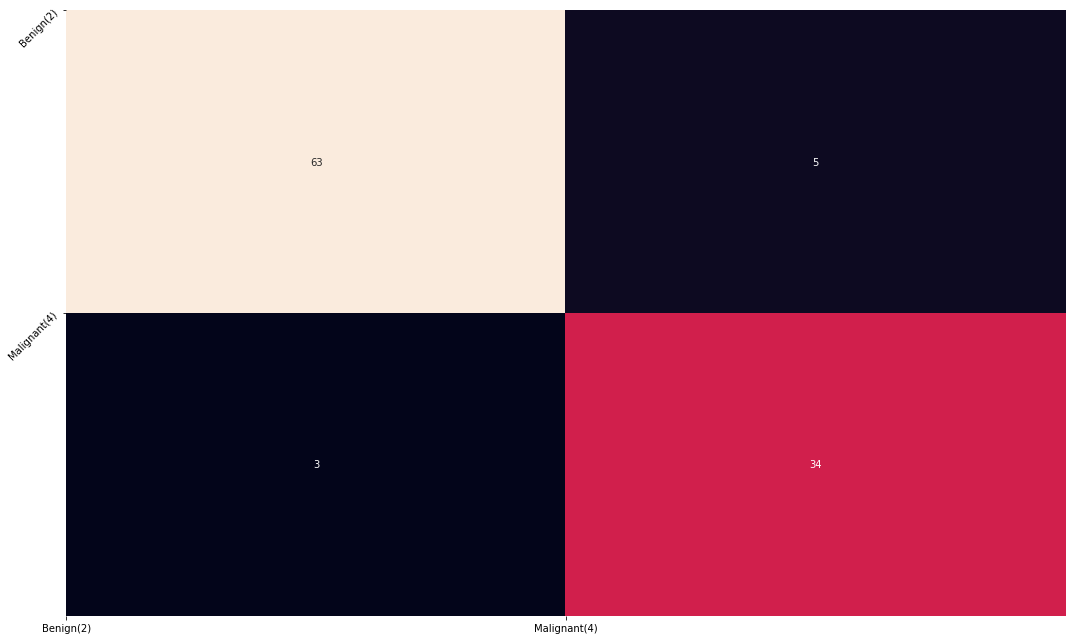

In [123]:
# Using kernel Linear
classifier = SVC(kernel = "linear")
classifier.fit(x_train, y_train)
print("Score of the Model = ",classifier.score(x_test, y_test))
y_pred = classifier.predict(x_test)
print("Accuracy of the Model = ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize = (15, 9))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cbar = False)
plt.xticks(np.arange(len(data["Class"].unique())), labels = ["Benign(2)", "Malignant(4)"])
plt.yticks(np.arange(len(data["Class"].unique())), labels = ["Benign(2)", "Malignant(4)"], rotation = 45)
plt.tight_layout()
plt.show()

## Training SVM with Polynomial Kernel

Score of the Model =  0.9142857142857143
Accuracy of the Model =  0.9142857142857143
              precision    recall  f1-score   support

           2       0.94      0.93      0.93        68
           4       0.87      0.89      0.88        37

    accuracy                           0.91       105
   macro avg       0.90      0.91      0.91       105
weighted avg       0.91      0.91      0.91       105



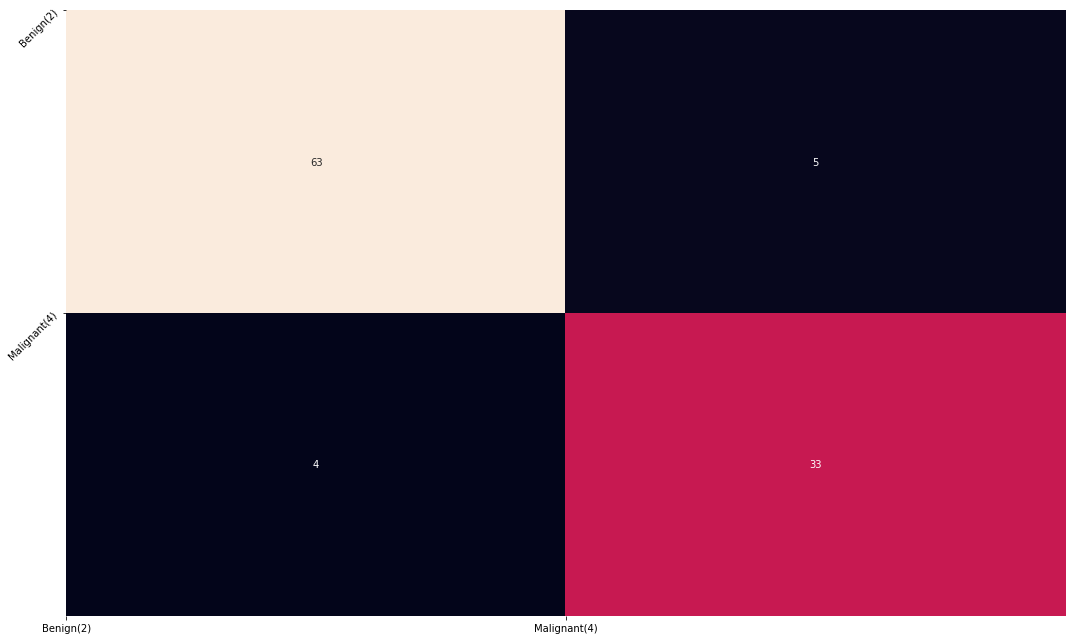

In [124]:
# Using kernel Polynomial
classifier = SVC(kernel = "poly")
classifier.fit(x_train, y_train)
print("Score of the Model = ",classifier.score(x_test, y_test))
y_pred = classifier.predict(x_test)
print("Accuracy of the Model = ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize = (15, 9))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cbar = False)
plt.xticks(np.arange(len(data["Class"].unique())), labels = ["Benign(2)", "Malignant(4)"])
plt.yticks(np.arange(len(data["Class"].unique())), labels = ["Benign(2)", "Malignant(4)"], rotation = 45)
plt.tight_layout()
plt.show()

## Training SVM with Sigmoid Kernel

Score of the Model =  0.3904761904761905
Accuracy of the Model =  0.3904761904761905
              precision    recall  f1-score   support

           2       0.53      0.59      0.56        68
           4       0.03      0.03      0.03        37

    accuracy                           0.39       105
   macro avg       0.28      0.31      0.29       105
weighted avg       0.35      0.39      0.37       105



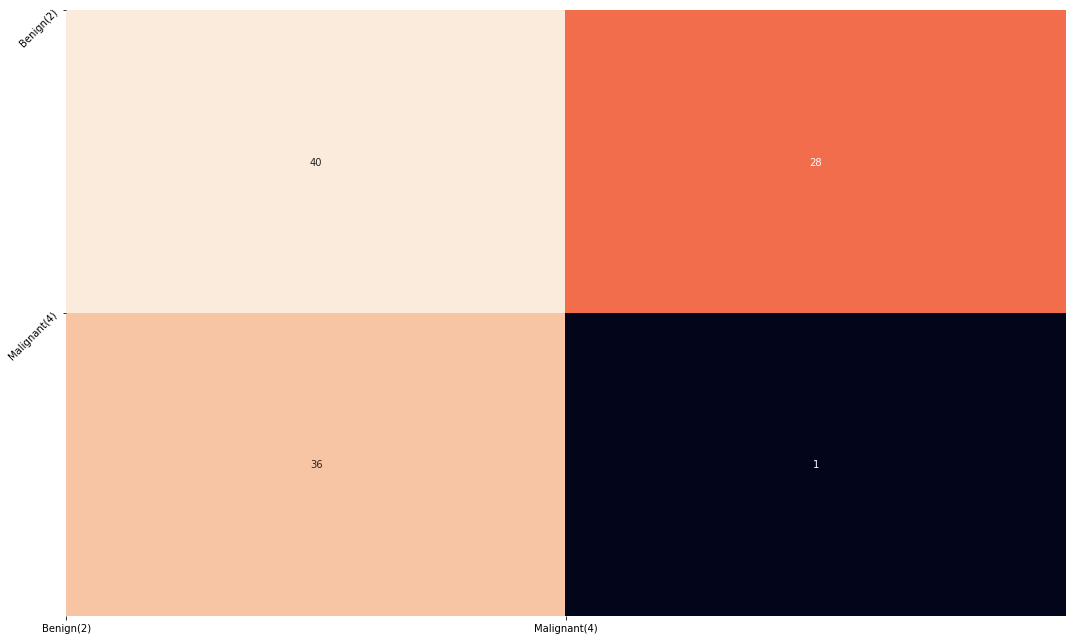

In [126]:
# Using kernel Sigmoid
classifier = SVC(kernel = "sigmoid")
classifier.fit(x_train, y_train)
print("Score of the Model = ",classifier.score(x_test, y_test))
y_pred = classifier.predict(x_test)
print("Accuracy of the Model = ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize = (15, 9))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cbar = False)
plt.xticks(np.arange(len(data["Class"].unique())), labels = ["Benign(2)", "Malignant(4)"])
plt.yticks(np.arange(len(data["Class"].unique())), labels = ["Benign(2)", "Malignant(4)"], rotation = 45)
plt.tight_layout()
plt.show()

# I Hope this work provides the clear image of all the kernels of SVM and classification using it. Thank you so much for investng your time in my work.